In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import scipy.stats as stats
import os
from IPython.display import HTML, display
import calendar
from datetime import datetime
import collections

sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Data Loading

In [17]:
#dfs = []
dfs = {}

path = '../US_Datasets/Data'
for file in os.listdir(path):
    #print(file)
    df = pd.read_csv(path + '/' + file)
    date = datetime.strptime(file.split('_')[0], '%y.%d.%m').date()
    dfs[date] = df
    
dfs = collections.OrderedDict(sorted(dfs.items()))
print(dfs.keys())

odict_keys([datetime.date(2019, 12, 11), datetime.date(2019, 12, 12), datetime.date(2019, 12, 13), datetime.date(2019, 12, 14), datetime.date(2019, 12, 15), datetime.date(2019, 12, 17), datetime.date(2019, 12, 18), datetime.date(2019, 12, 19), datetime.date(2019, 12, 20), datetime.date(2019, 12, 21), datetime.date(2019, 12, 22), datetime.date(2019, 12, 23), datetime.date(2019, 12, 24), datetime.date(2019, 12, 25), datetime.date(2019, 12, 27), datetime.date(2019, 12, 29), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 4), datetime.date(2020, 1, 5), datetime.date(2020, 1, 6), datetime.date(2020, 1, 7), datetime.date(2020, 1, 8), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 17), datetime.date(2020, 1, 18), datetime.date(2020, 1, 19), datetime.date(2020, 1, 20), 

In [18]:
class YTVideo:
    def __init__(self, df_row, days_in_trending=1):
        self.video_id = df_row.video_id
        self.title = df_row.title
        self.published_at = df_row.publishedAt
        self.channel_id = df_row.channelId
        self.channel_title = df_row.channelTitle
        self.category_id = df_row.categoryId
        self.trending_date = df_row.trending_date
        self.tags = df_row.tags
        self.view_count = df_row.view_count
        self.likes = df_row.likes
        self.dislikes = df_row.dislikes
        self.comment_count = df_row.comment_count
        self.thumbnail_link = df_row.thumbnail_link
        self.comments_disabled = df_row.comments_disabled
        self.ratings_disabled = df_row.ratings_disabled
        self.description = df_row.description
        self.days_in_trending = days_in_trending
        
    def __str__(self):
        retval = 'Video ID: {}\nTitle: {}\nPublished at: {}\nChannel ID: {}\nChannel title: {}\nCategory ID: {}\nTrending date: {}\nTags: {}\nView count: {}\nLikes: {}\nDislikes: {}\nComment count: {}\nThumbnail link: {}\nComments disabled: {}\nRatings disabled: {}\nDescription: {}\nDays in trending: {}\n'.format(self.video_id, self.title, self.published_at, self.channel_id, self.channel_title, self.category_id, self.trending_date, self.tags, self.view_count, self.likes, self.dislikes, self.comment_count, self.thumbnail_link, self.comments_disabled, self.ratings_disabled, self.description, self.days_in_trending)
        return retval
    
    def to_dict(self):
        return {
            'video_id': self.video_id,
            'title': self.title,
            'published_at': self.published_at,
            'channel_id': self.channel_id,
            'channel_title': self.channel_title,
            'category_id': self.category_id,
            'trending_date': self.trending_date,
            'tags': self.tags,
            'view_count': self.view_count,
            'likes': self.likes,
            'dislikes': self.dislikes,
            'comment_count': self.comment_count,
            'thumbnail_link': self.thumbnail_link,
            'comments_disabled': self.comments_disabled,
            'ratings_disabled': self.ratings_disabled,
            'description': self.description,
            'days_in_trending': self.days_in_trending
        }

In [19]:
first_day = list(dfs.values())[0].iloc[0].trending_date
last_day = list(dfs.values())[-1].iloc[0].trending_date
print('First day: {}'.format(first_day))
print('Last day: {}'.format(last_day))

videos = dict()

# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka
for df in dfs.values():
    for index, row in df.iterrows():
        if row.video_id in videos:
            videos[row.video_id].days_in_trending += 1
        else:
            # provera da li video iz naseg prvog dana
            if row.trending_date != first_day and row.trending_date != last_day:
                videos[row.video_id] = YTVideo(row)

First day: 19.11.12
Last day: 20.13.02


In [26]:
for video in videos.values():
    print(video)
    print('---------------------------------------------------------------------------------------------------')

Video ID: y7TlnQq6XzI
Title: congrats ksi
Published at: 2019-12-11T18:59:22.000Z
Channel ID: UCG8rbF3g2AMX70yOd8vqIZg
Channel title: Logan Paul
Category ID: 24
Trending date: 19.12.12
Tags: logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|ksi|ksi vs logan|logan paul boxing|logan paul appeal|logan paul fight|logan paul boxing fight|boxing review|ksi boxing|logan appeal|two points|raid|shadow legends
View count: 2044821
Likes: 139610
Dislikes: 30568
Comment count: 21254
Thumbnail link: https://i.ytimg.com/vi/y7TlnQq6XzI/default.jpg
Comments disabled: False
Ratings disabled: False
Description: Install Raid for Free ✅ IOS: http://bit.ly/LoganPaul_iOS ✅ ANDROID: http://bit.ly/LoganPaul_android Start with💰50K silver and get a Free Epic Champion 💥 on day 7 of “New Player Rewards” programJoin the movement. Be a Maverick ► https://ShopLoganPaul.com/on to the next chapter...SUBSCRIBE FOR DAILY VLOGS! ► http://bit.

---------------------------------------------------------------------------------------------------
Video ID: a0HJTwmFN4k
Title: THIS CLUB'S A SLOW DEATH! Man United 1-3 Man City Semi-Final EFL CUP | Andy Tate Fan Cam
Published at: 2020-01-07T23:31:44.000Z
Channel ID: UC7w8GnTF2Sp3wldDMtCCtVw
Channel title: FullTimeDEVILS
Category ID: 17
Trending date: 20.09.01
Tags: manchester united|manchester|man utd|football|soccer|fulltimedevils|full time devils|manchester united news|united|man united|solskjaer|mufc|manchester united fan tv|man utd fan tv|fan channel|man u transfer news|manchester utd|utd|man utd vs man city|1-3|utd 1-3 city|manchester derby|man utd 1-3 man city|rashford goal vs city|rashford goal|ole gunnar solskjaer|jesse lingard|phil jones|brandon williams|david de gea|efl cup|carabao cup|fan reaction
View count: 80130
Likes: 1348
Dislikes: 136
Comment count: 606
Thumbnail link: https://i.ytimg.com/vi/a0HJTwmFN4k/default.jpg
Comments disabled: False
Ratings disabled: False
Des

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
print('Broj videa: {}'.format(len(videos)))

Broj videa: 2272


In [21]:
# kreiranje dataframe-a
videos_df = pd.DataFrame([video.to_dict() for video in videos.values()])

In [22]:
videos_df

video_id                                              title  \
0     vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1     sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2     q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3     t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4     TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   
...           ...                                                ...   
2267  WqQgivAanN8  The Oscars 2020 | Chris Rock & Steve Martin cr...   
2268  lMsa3CFILc0          Buying New Polaris RS1 and Crashing it!!!   
2269  SG6JTm4w5sg  Guess That Celebrity From Their Old MySpace Ph...   
2270  6xOYTMi2UDY  $169 eBay Turbo Big Block Yaris (Lets Finish T...   
2271  whe8-gpq40c  Rob Parker isn't buying that LeBron, Lakers fr...   

                  published_at                channel_id  \
0     2019-12-11T07:08:34.000Z  UCJ0uqCI0Vqr2Rrt1HseGirg   
1     2019-12-12T05:25:42.000Z  UCDSJCBYqL7VQrlXfhr1RtwA   
2     2019-12-11T23:00:53.000Z  UCQIUhhcmXsu6cN6n3y9-Pww   
3     2019-12-12T02:35:33.000Z  UCWJ2lWNubArHWmf3FIHbfcQ   
4     2019-12-12T02:38:37.000Z  UCtj45MepAoKxZoyR_Mnt86Q   
...                        ...                       ...   
2267  2020-02-10T17:12:58.000Z  UCokpOoe2OrddBfl6I_oY5vQ   
2268  2020-02-11T01:00:08.000Z  UCBNnILlexKYtJu-EGUvq_iA   
2269  2020-02-10T20:00:04.000Z  UCHEf6T_gVq4tlW5i91ESiWg   
2270  2020-02-10T21:08:41.000Z  UCgJRL30YS6XFxq9Ga8W2J3A   
2271  2020-02-10T17:28:35.000Z  UCLXzq85ijg2LwJWFrz4pkmw   

                             channel_title  category_id trending_date  \
0     The Late Late Show with James Corden           24      19.12.12   
1                            Les Do Makeup           26      19.12.12   
2                                   Jesser           17      19.12.12   
3                                      NBA           17      19.12.12   
4                             Royal Family           24      19.12.12   
...                                    ...          ...           ...   
2267                         FOX Nederland           24      20.12.02   
2268                               CboysTV           22      20.12.02   
2269                                 REACT           24      20.12.02   
2270                       Mighty Car Mods            2      20.12.02   
2271          Skip and Shannon: UNDISPUTED           17      20.12.02   

                                                   tags  view_count   likes  \
0     The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                                [none]      423215   52780   
2     last to leave|nba basketball|nba basketball hi...      463685   20178   
3     sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4     queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   
...                                                 ...         ...     ...   
2267  the oscars|92nd academy awards|oscars|oscars 2...      963897   12180   
2268  cboys|cboystv|vlog|funny|polaris|side by side|...      190689    7723   
2269  Harry Styles|Taylor Swift|Donald Glover|MySpac...      492733   14351   
2270  mighty|car|mods|mcm|MCM|moog|marty|turbo|jdm|h...      818816   31261   
2271  nba|basketball|LEBRON JAMES|ANTHONY DAVIS|MARC...      191785    1861   

      dislikes  comment_count                                  thumbnail_link  \
0         8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1          773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2          586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3          288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4          164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   
...        ...            ...                                             ...   
2267       578            960 

In [23]:
# add category_name label to dataframe
category_df = pd.read_csv('../GB_Datasets/Categories.csv')

def map_category_id_to_name(category_id):
    return category_df[category_df['category_id'] == category_id]['category_name'].values[0]

videos_df['category_name'] = videos_df['category_id'].apply(lambda var: map_category_id_to_name(var))

In [24]:
videos_df.head()

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

               published_at                channel_id  \
0  2019-12-11T07:08:34.000Z  UCJ0uqCI0Vqr2Rrt1HseGirg   
1  2019-12-12T05:25:42.000Z  UCDSJCBYqL7VQrlXfhr1RtwA   
2  2019-12-11T23:00:53.000Z  UCQIUhhcmXsu6cN6n3y9-Pww   
3  2019-12-12T02:35:33.000Z  UCWJ2lWNubArHWmf3FIHbfcQ   
4  2019-12-12T02:38:37.000Z  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24      19.12.12   
1                         Les Do Makeup           26      19.12.12   
2                                Jesser           17      19.12.12   
3                                   NBA           17      19.12.12   
4                          Royal Family           24      19.12.12   

                                                tags  view_count   likes  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                             [none]      423215   52780   
2  last to leave|nba basketball|nba basketball hi...      463685   20178   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   

   dislikes  comment_count                                  thumbnail_link  \
0      8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1       773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2       586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3       288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4       164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                 1   
1  Hi babygirls!  Thank you so much for watching ...                 7   
2  Last to miss the basketball shot wins 10,000!●...                 7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                 2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                 6   

    category_name  
0   Entertainment  
1  How-to & Style  
2           Sport  
3           Sport  
4   Entertainment

# Exploratory Data Analysis

### Top 15 most popular categories by number of videos in trending

[Text(0, 0.5, 'Number of videos in trending'), Text(0.5, 0, 'Category')]

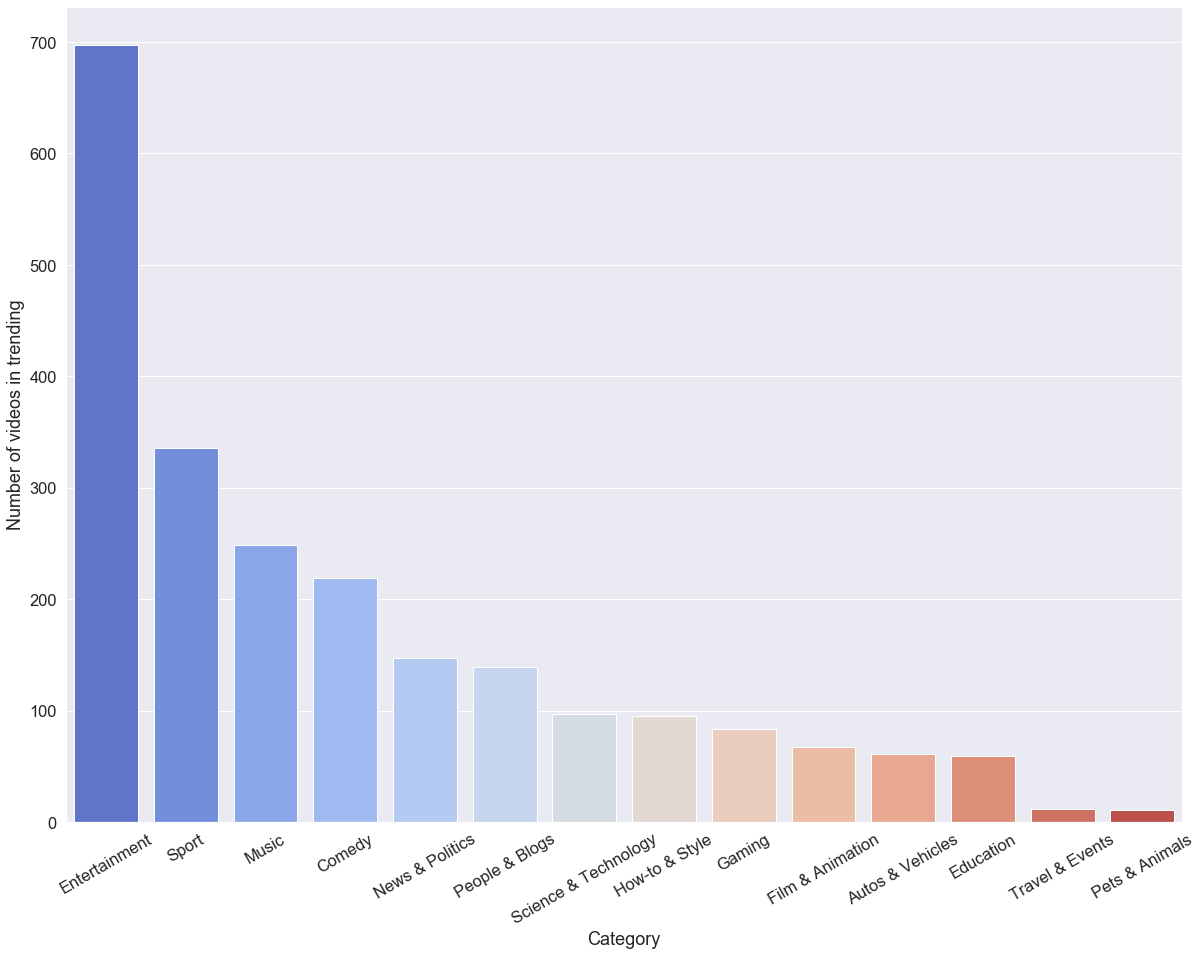

In [25]:
# Most popular categories by number of videos in trending
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='category_name', data=videos_df, order=videos_df['category_name'].value_counts().index, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='Category', ylabel='Number of videos in trending')

### Top 15 most popular channels by number of videos in trending

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Number of videos in trending')]

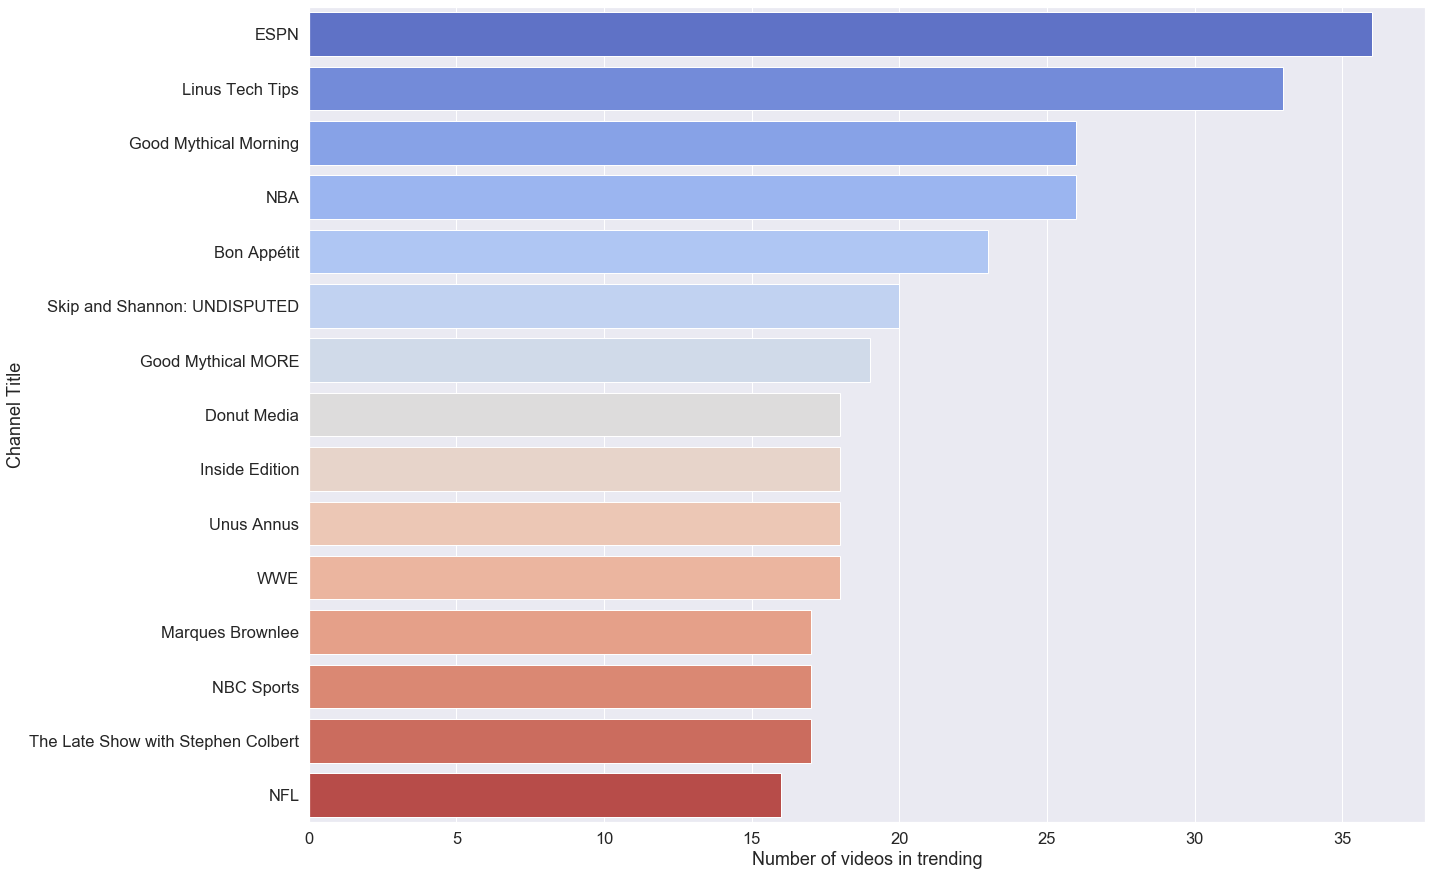

In [26]:
# Most popular channels by number of videos in trending
channel_trending_videos = videos_df.groupby('channel_title')[['video_id', 'channel_title']].count()
top_channels = channel_trending_videos.nlargest(15, 'video_id')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_channels['channel_title'], y=top_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Number of videos in trending', ylabel='Channel Title')

### Top 15 most popular channels by number of views

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of views')]

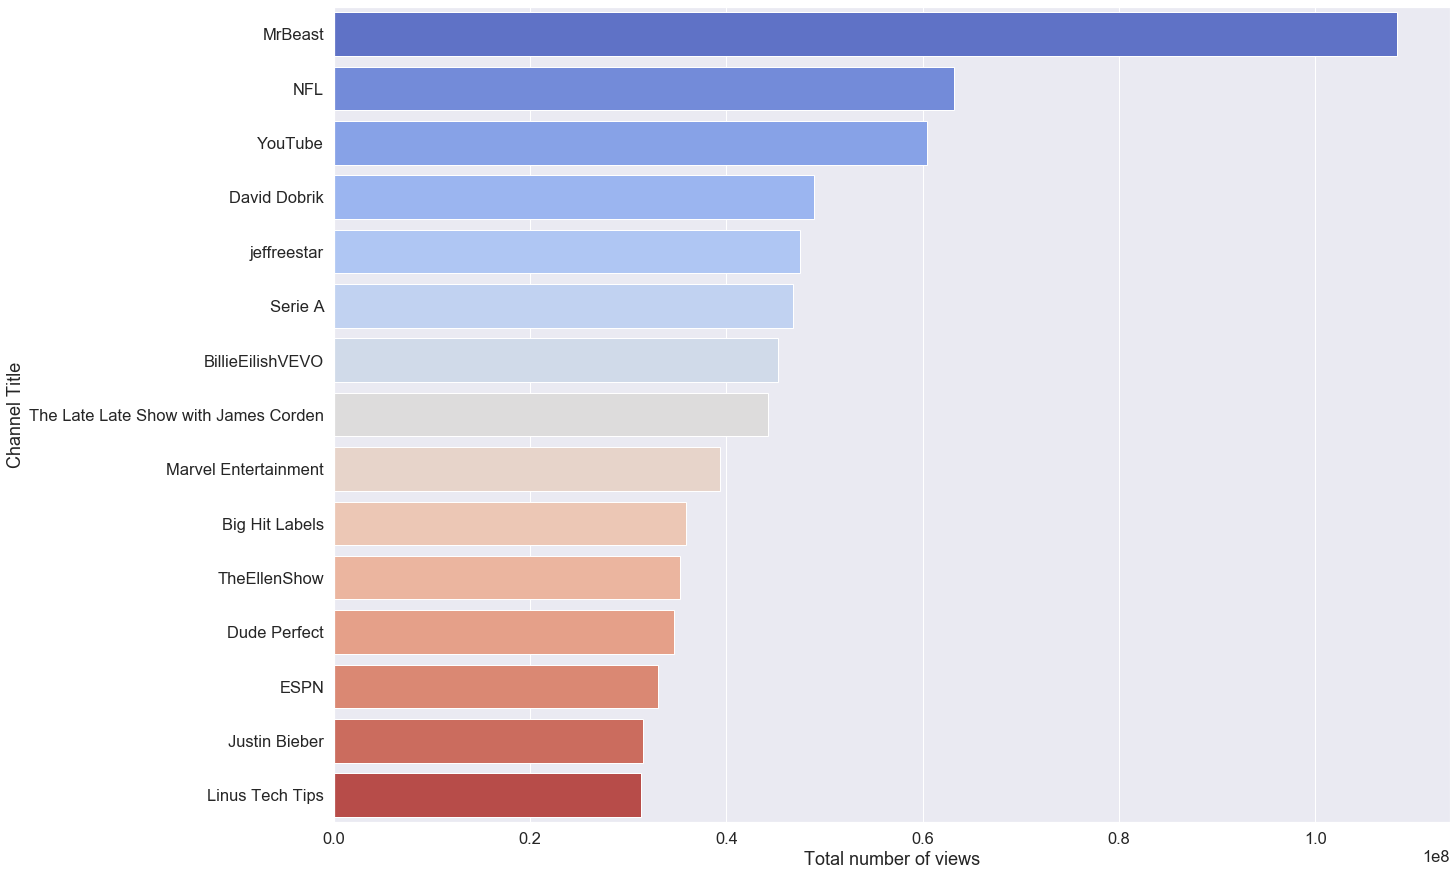

In [27]:
top_views_channels = videos_df.groupby('channel_title')[['view_count', 'channel_title']].sum()
top_viwes_channels = top_views_channels.nlargest(15, 'view_count')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_viwes_channels['view_count'], y=top_viwes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of views', ylabel='Channel Title')

### Top 15 most popular channels by number of likes

[Text(0, 0.5, 'Channel Title'), Text(0.5, 0, 'Total number of likes')]

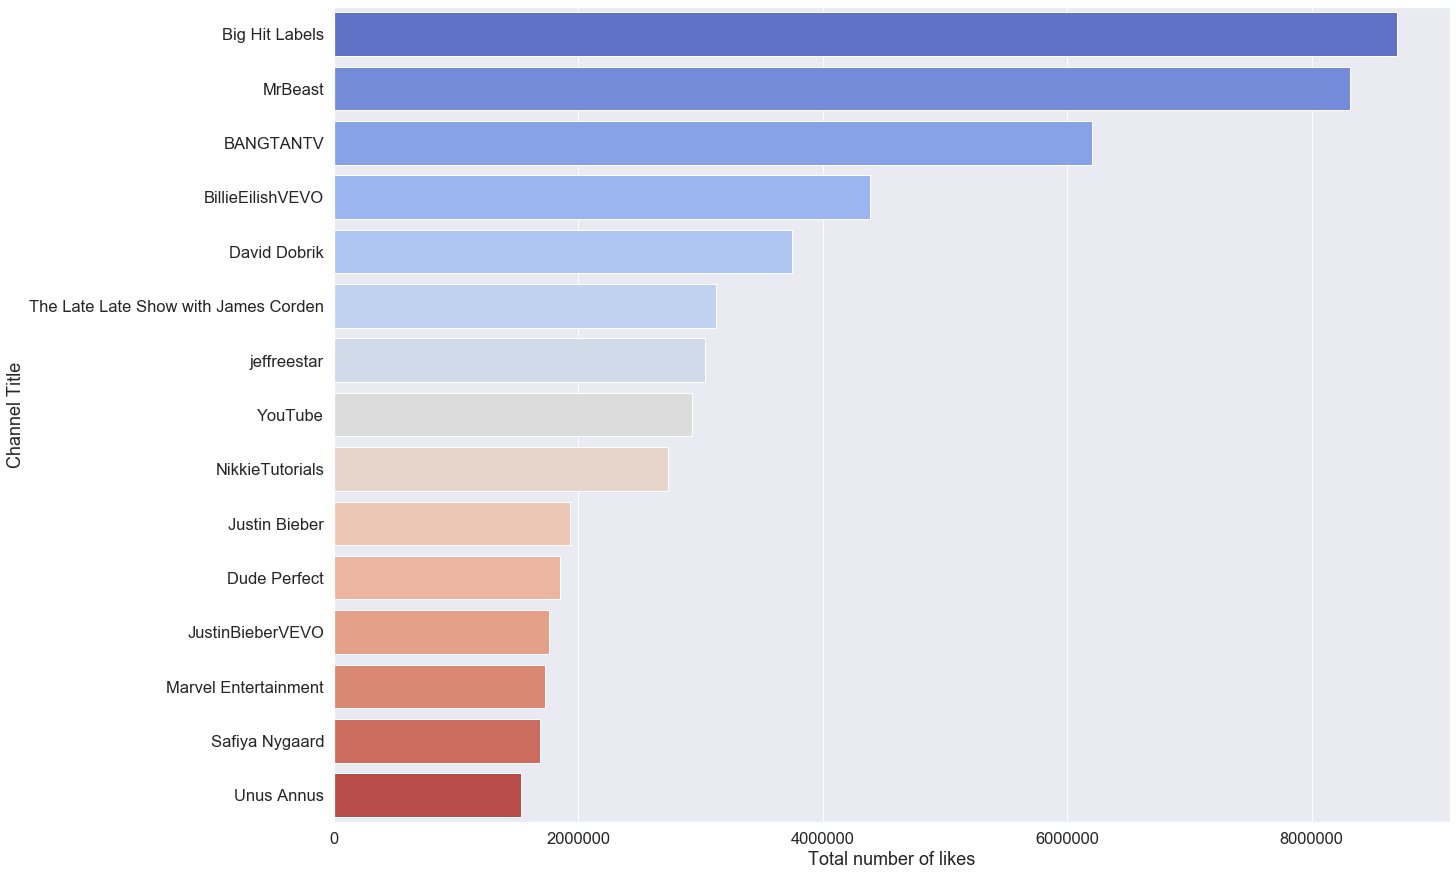

In [28]:
top_likes_channels = videos_df.groupby('channel_title')[['likes', 'channel_title']].sum()
top_likes_channels = top_likes_channels.nlargest(15, 'likes')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_likes_channels['likes'], y=top_likes_channels.index, palette='coolwarm', ax=ax)
ax.set(xlabel='Total number of likes', ylabel='Channel Title')

### Processing the dates

In [29]:
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos_df.head()

# get date or time from datetime
#videos_df['published_at'].dt.time
#videos_df['published_at'].dt.date

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                             [none]      423215   52780   
2  last to leave|nba basketball|nba basketball hi...      463685   20178   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   

   dislikes  comment_count                                  thumbnail_link  \
0      8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1       773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2       586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3       288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4       164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                 1   
1  Hi babygirls!  Thank you so much for watching ...                 7   
2  Last to miss the basketball shot wins 10,000!●...                 7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                 2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                 6   

    category_name  
0   Entertainment  
1  How-to & Style  
2           Sport  
3           Sport  
4   Entertainment

### Adding new column for number of days from video posting to trending

In [30]:
publish_to_trend = videos_df['trending_date'].dt.date - videos_df['published_at'].dt.date
videos_df['publish_to_trend'] = publish_to_trend.dt.days
videos_df.head()

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835   
1                                             [none]      423215   52780   
2  last to leave|nba basketball|nba basketball hi...      463685   20178   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400   

   dislikes  comment_count                                  thumbnail_link  \
0      8256          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1       773          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2       586            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3       288            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4       164           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                 1   
1  Hi babygirls!  Thank you so much for watching ...                 7   
2  Last to miss the basketball shot wins 10,000!●...                 7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                 2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                 6   

    category_name  publish_to_trend  
0   Entertainment                 1  
1  How-to & Style                 0  
2           Sport                 1  
3           Sport                 0  
4   Entertainment                 0

### Top 15 videos that were the longest in trending

[Text(0, 0.5, 'Video Title'), Text(0.5, 0, 'Days in trending')]

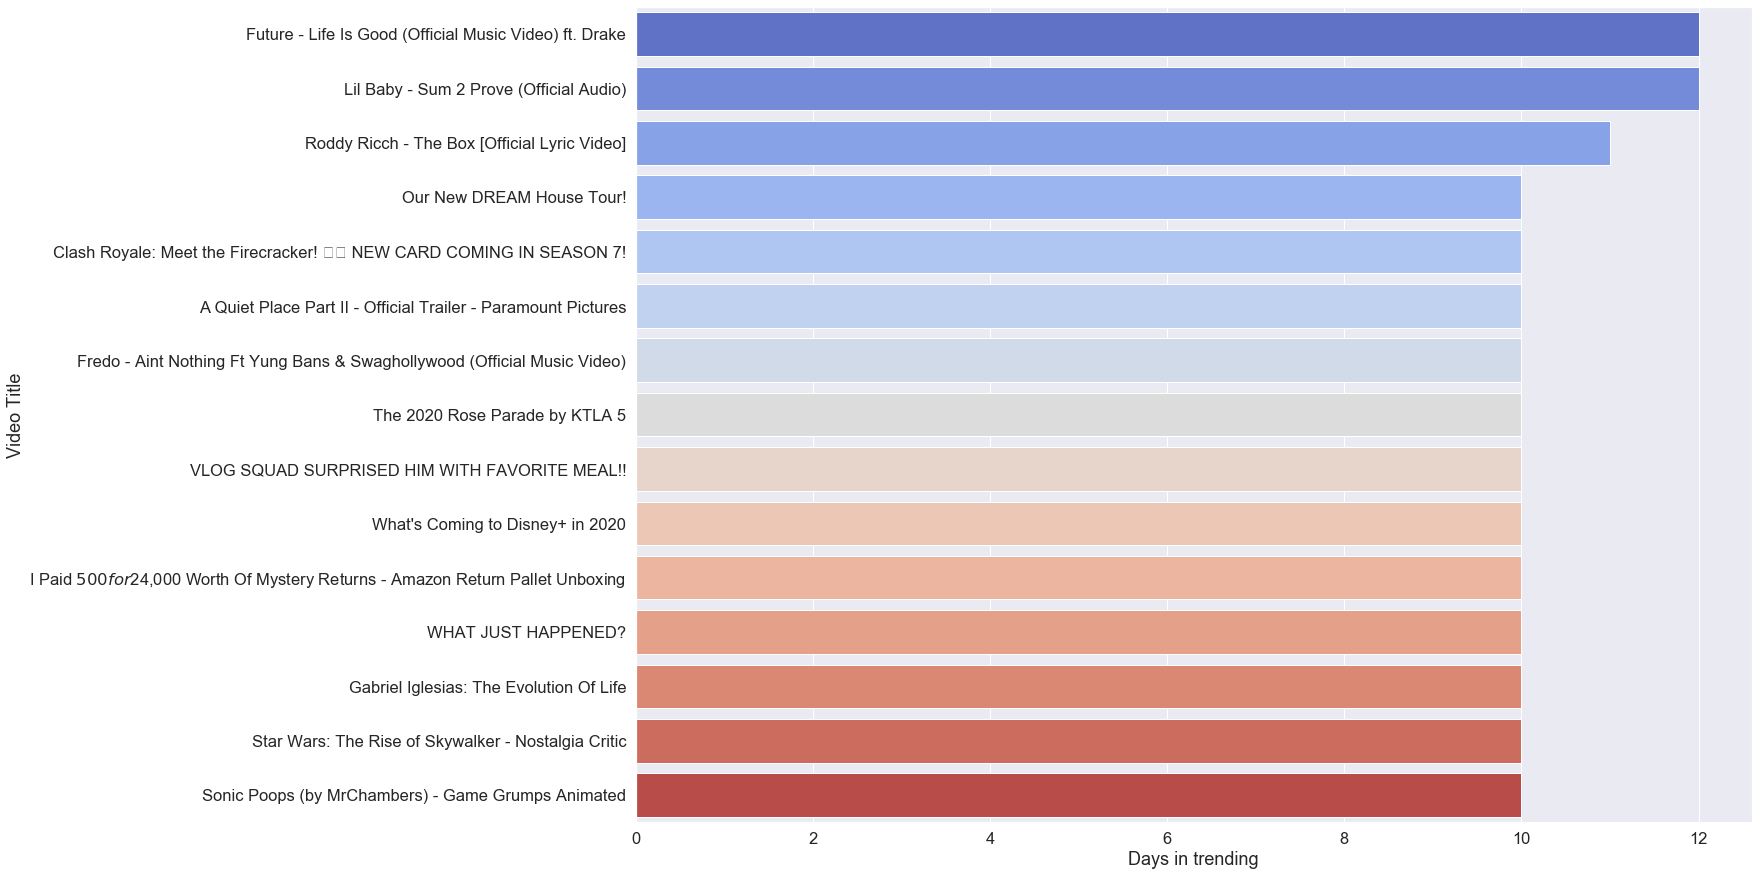

In [32]:
# top 15 videos that were the longest in trending
top_videos = videos_df.nlargest(15, 'days_in_trending')

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=top_videos['days_in_trending'], y=top_videos['title'], palette='coolwarm', ax=ax)
ax.set(xlabel='Days in trending', ylabel='Video Title')

[Text(0.5, 0, 'Days in trending')]

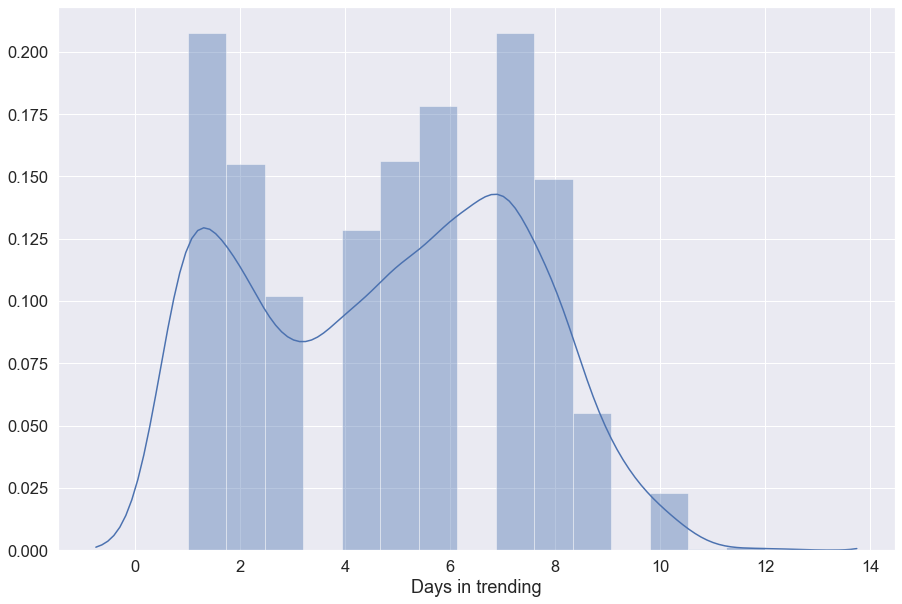

In [33]:
# distribution of days in trending
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(videos_df['days_in_trending'])
ax.set(xlabel='Days in trending')

### Likes/Dislikes ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Likes/Dislikes Ratio')]

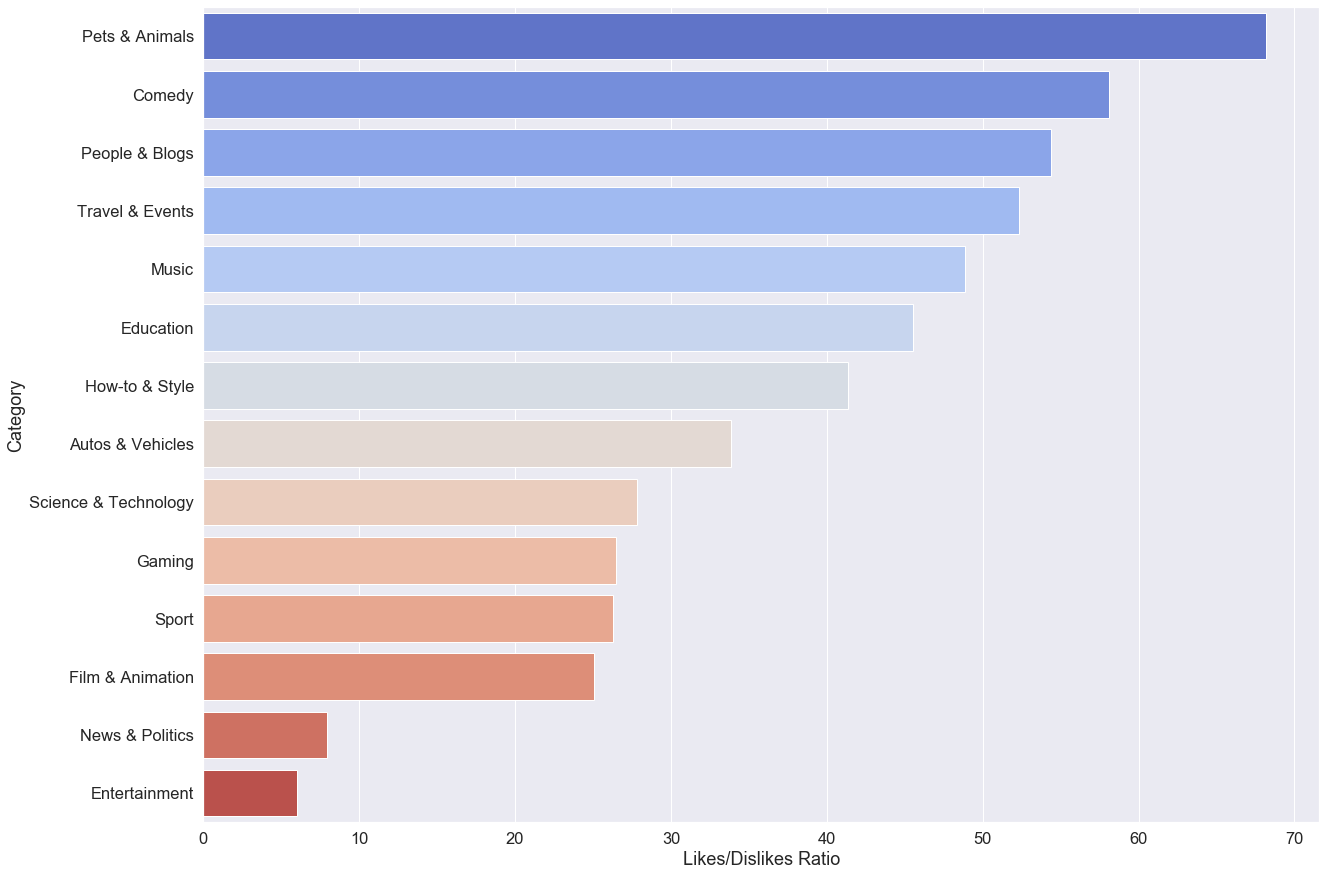

In [34]:
like_dislike_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['dislikes'].sum()
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=like_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Likes/Dislikes Ratio', ylabel='Category')

### Comments/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Comments Ratio')]

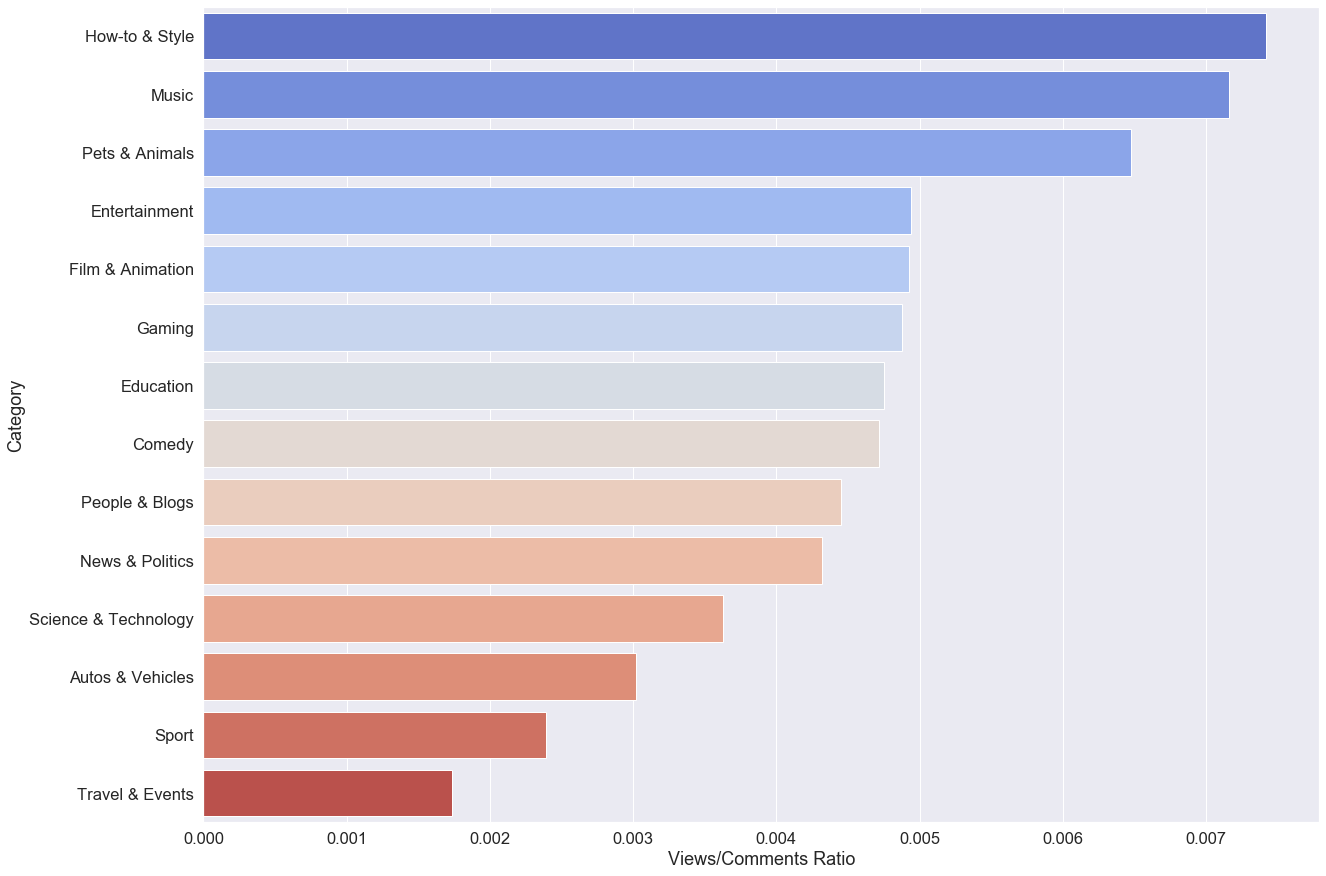

In [35]:
view_comment_ratio = videos_df.groupby('category_name')['comment_count'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_comment_ratio = view_comment_ratio.sort_values(ascending=False).reset_index()
view_comment_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_comment_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Comments Ratio', ylabel='Category')

### Likes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Likes Ratio')]

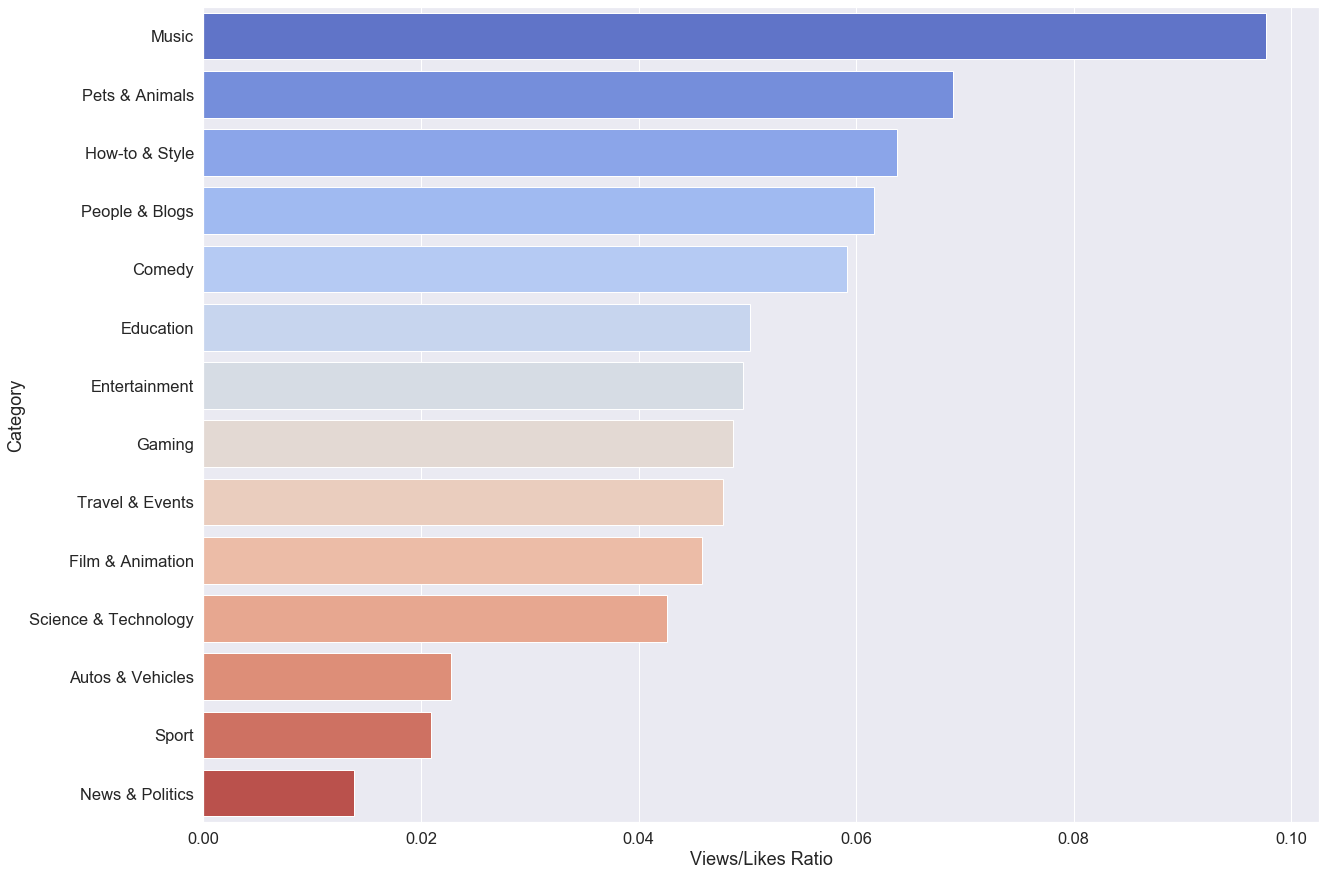

In [36]:
view_like_ratio = videos_df.groupby('category_name')['likes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_like_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Likes Ratio', ylabel='Category')

### Dislikes/Views ratio by category

[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Views/Dislikes Ratio')]

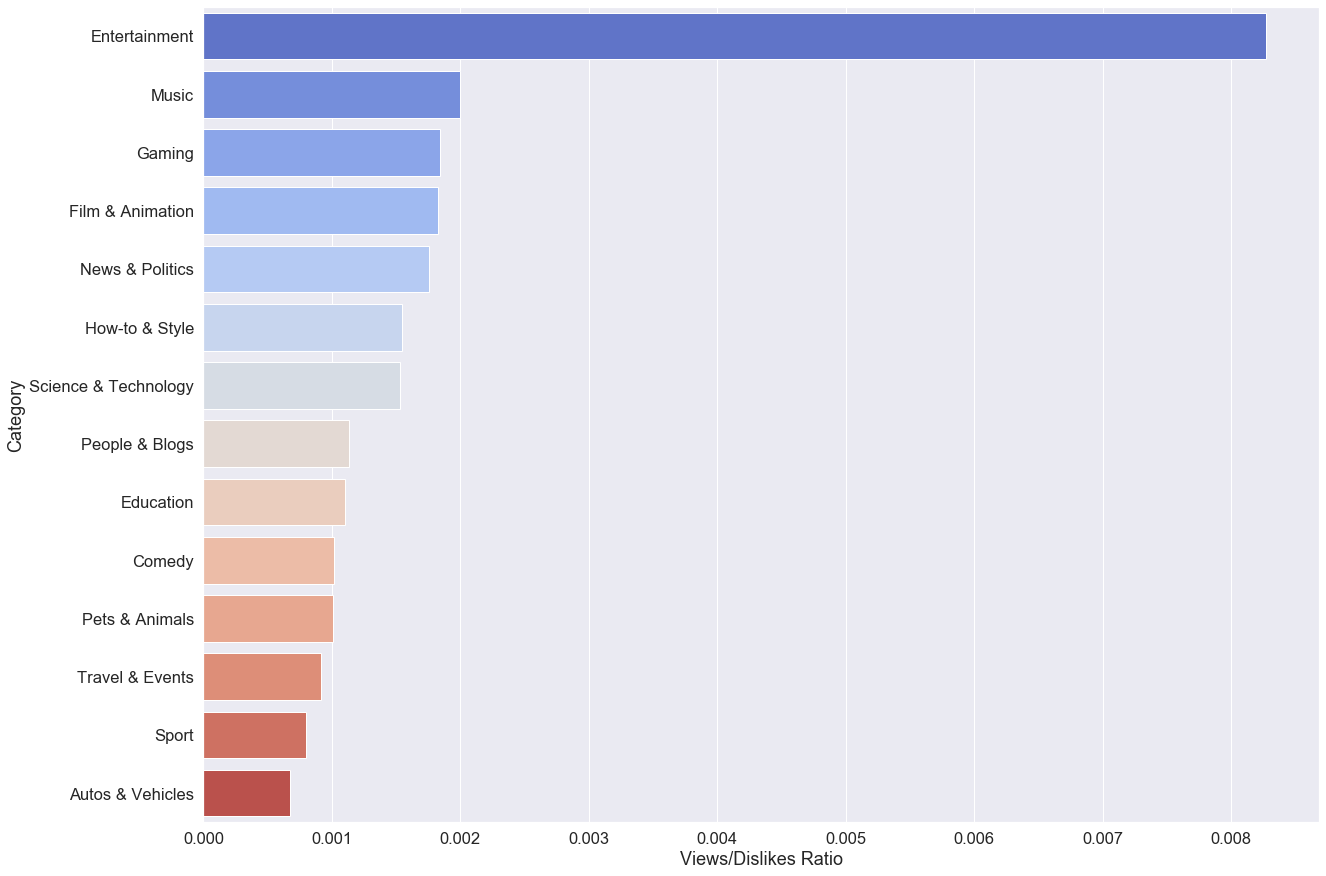

In [37]:
view_dislike_ratio = videos_df.groupby('category_name')['dislikes'].sum() / videos_df.groupby('category_name')['view_count'].sum()
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x='ratio', y='category', data=view_dislike_ratio, palette='coolwarm', ax=ax)
ax.set(xlabel='Views/Dislikes Ratio', ylabel='Category')

### Top views videos wall

In [38]:
top_videos = videos_df.sort_values('view_count', ascending=False)
top_videos_thumbnail = top_videos['thumbnail_link'].head(100).reset_index()['thumbnail_link']
top_videos_thumbnail

0     https://i.ytimg.com/vi/2lAe1cqCOXo/default.jpg
1     https://i.ytimg.com/vi/RxAtuMu_ph4/default.jpg
2     https://i.ytimg.com/vi/pILCn6VO_RU/default.jpg
3     https://i.ytimg.com/vi/gIOyB9ZXn8s/default.jpg
4     https://i.ytimg.com/vi/LZyybvVx-js/default.jpg
                           ...                      
95    https://i.ytimg.com/vi/1ofaAod-WoQ/default.jpg
96    https://i.ytimg.com/vi/OAAJpK1oE30/default.jpg
97    https://i.ytimg.com/vi/WN8IxjWFvW4/default.jpg
98    https://i.ytimg.com/vi/f7TCzxOS6H4/default.jpg
99    https://i.ytimg.com/vi/e5dir37rPok/default.jpg
Name: thumbnail_link, Length: 100, dtype: object

In [39]:
rows = 10
columns = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(rows):
    rowHTML = ''
    for c in range(columns):
        tempHTML = '<img src="' + top_videos_thumbnail[c*10 + r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML
innerHTML += '</div>'
display(HTML(innerHTML))

### Heatmap of Category vs Trending Duration ratio

Text(151.421875, 0.5, 'Category')

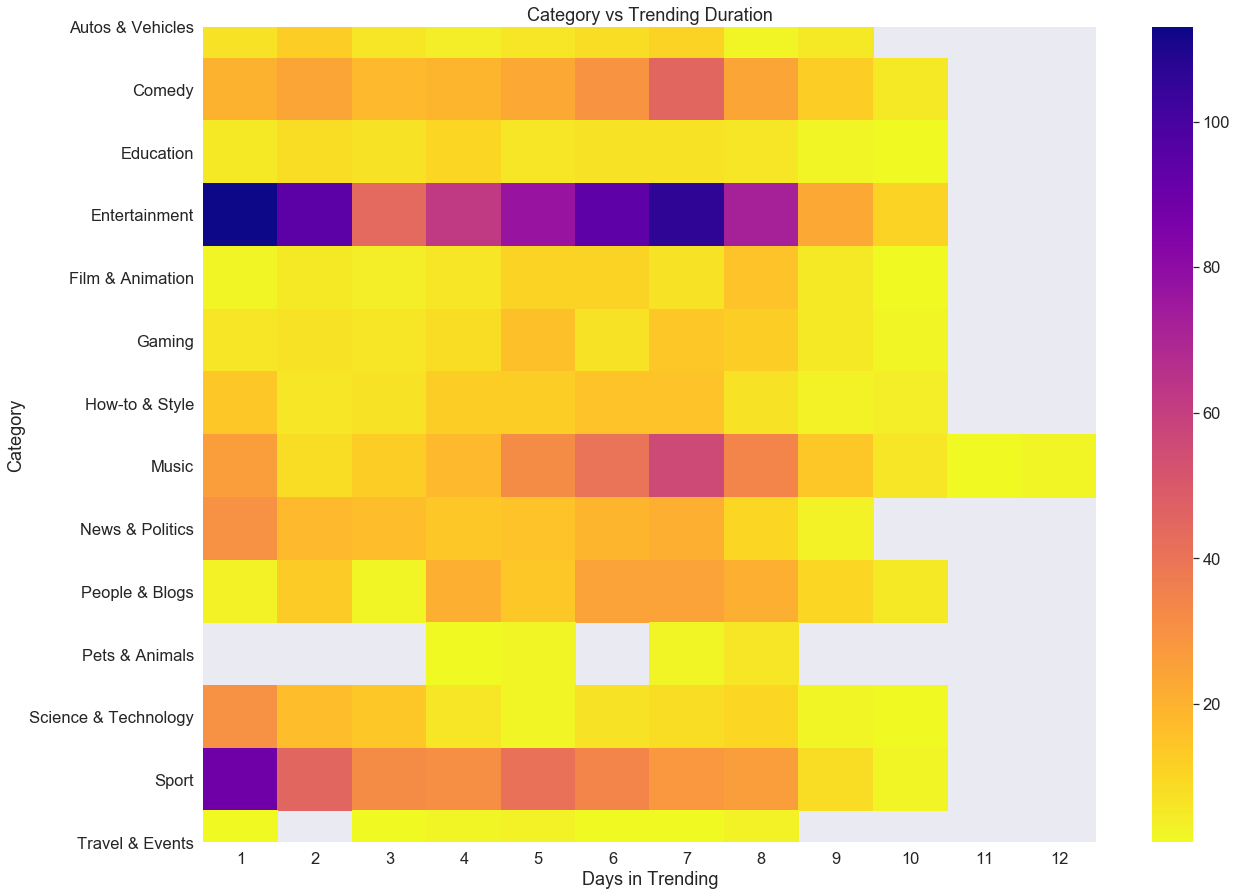

In [40]:
cat_trend_duration = videos_df.groupby(['category_name','days_in_trending']).count()['video_id'].unstack().clip(upper=300)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category vs Trending Duration")
plt.xlabel('Days in Trending')
plt.ylabel('Category')

### The most popular time to upload video

[Text(0, 0.5, 'Number of videos published at the specific hour'),
 Text(0.5, 0, 'The hour when the video was published')]

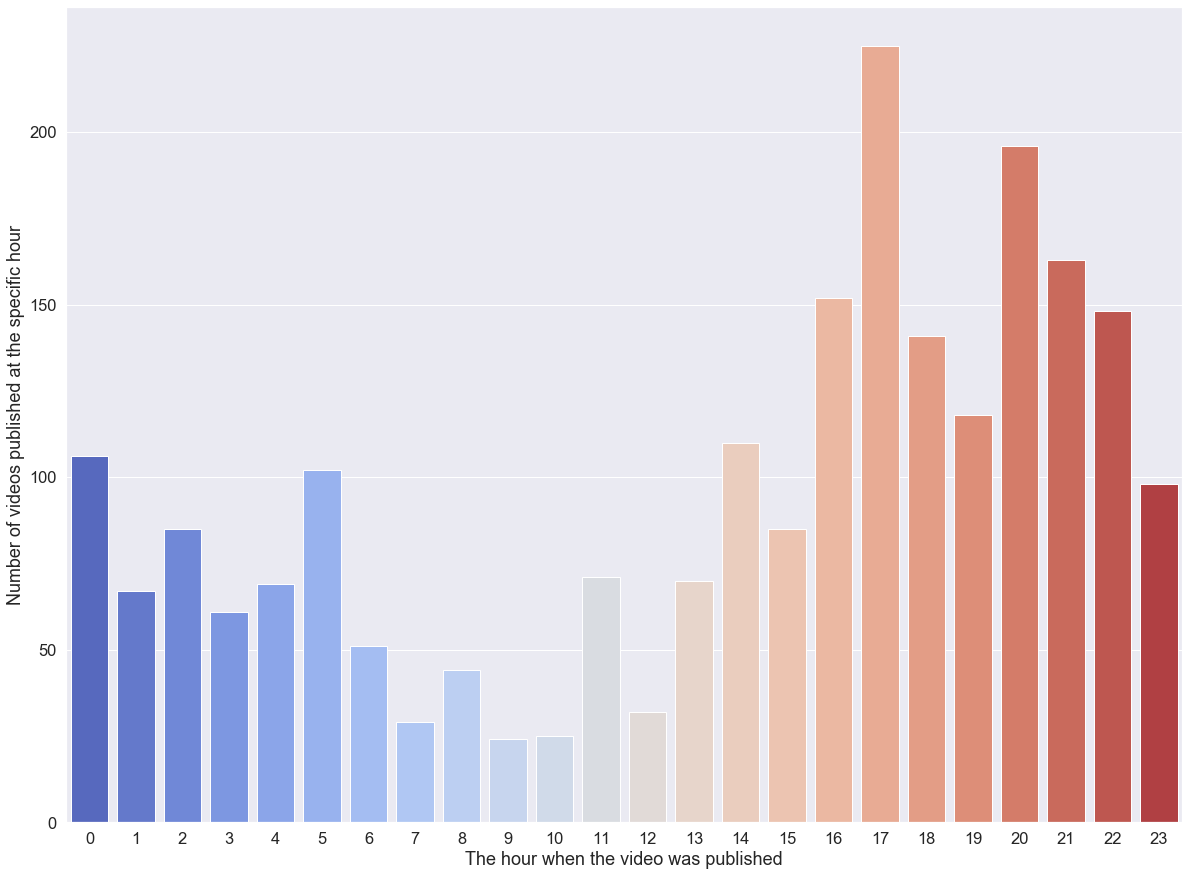

In [41]:
#most popular period of day to upload video

videos_df['publishing_hour'] = pd.to_datetime(videos_df['published_at']).dt.hour
videos_df.head()

num_videos_in_each_hour = videos_df.groupby('publishing_hour')[['video_id', 'publishing_hour']].count()

fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=num_videos_in_each_hour.index, y=num_videos_in_each_hour['video_id'], palette='coolwarm', ax=ax)
ax.set(xlabel='The hour when the video was published', ylabel='Number of videos published at the specific hour')

### The most popular day of week for publishing video

In [42]:
#get name of day from published_at
def map_date_to_day_name(date):
    return date.strftime('%A')

videos_df['publishing_day'] = videos_df['published_at'].apply(lambda var: map_date_to_day_name(var))

[Text(0, 0.5, 'Number of videos published at the specific day in week'),
 Text(0.5, 0, 'The day in week when the video was published')]

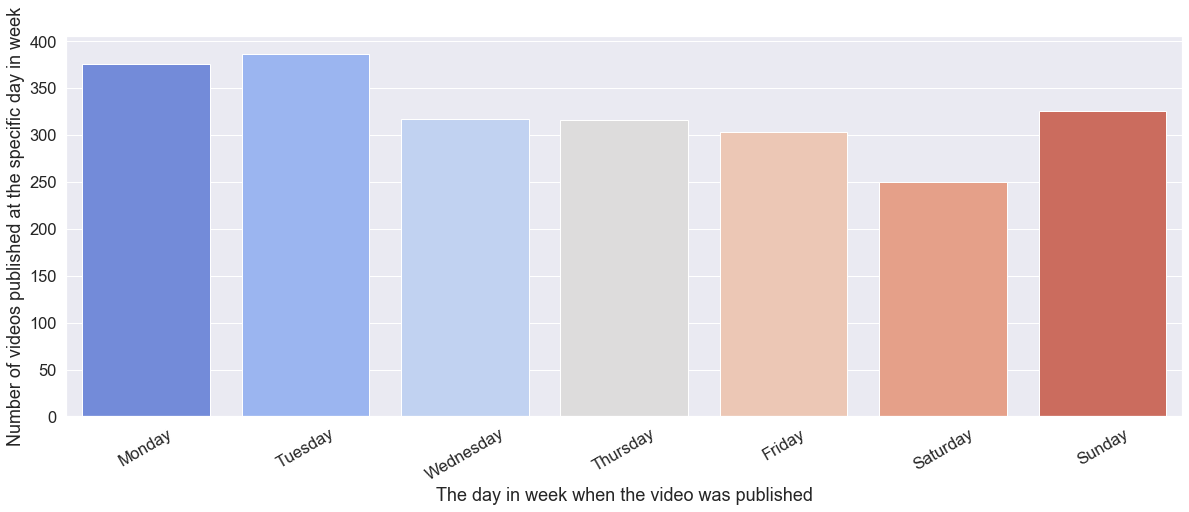

In [43]:
#most popular day to upload video

num_videos_in_each_day = videos_df.groupby('publishing_day')[['video_id', 'publishing_day']].count()
days_in_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x='publishing_day', data=videos_df, order=days_in_week, palette='coolwarm', ax=ax)
plt.xticks(rotation=30)
ax.set(xlabel='The day in week when the video was published', ylabel='Number of videos published at the specific day in week')

### Jointplots between likes, comments, views, days in trending, days to get in trending...

C:\Users\Marko\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5, 0.98, 'Corellation between likes and views')

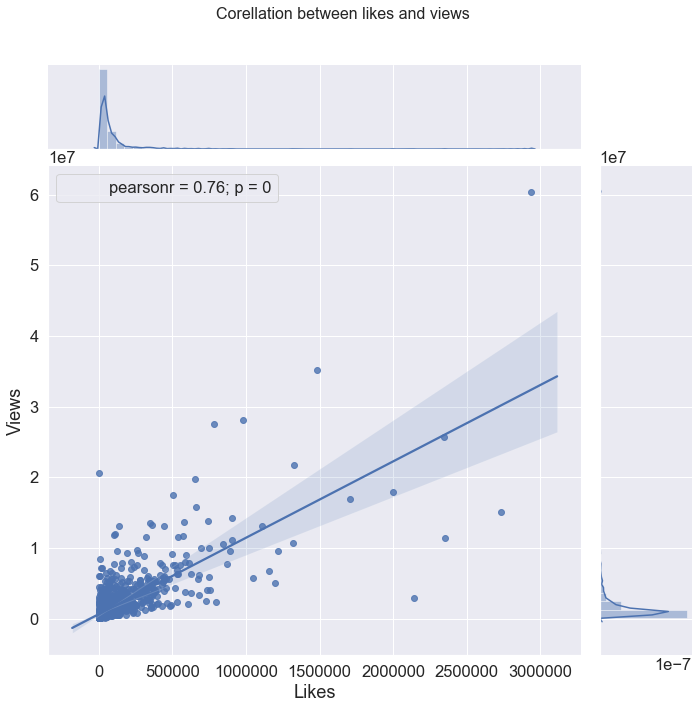

In [44]:
# Corellation between likes and views
likes_views = (sns.jointplot(data=videos_df, x='likes', y='view_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Views"))
likes_views.annotate(stats.pearsonr)
likes_views.fig.subplots_adjust(top=0.9)
likes_views.fig.suptitle('Corellation between likes and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between comments and views')

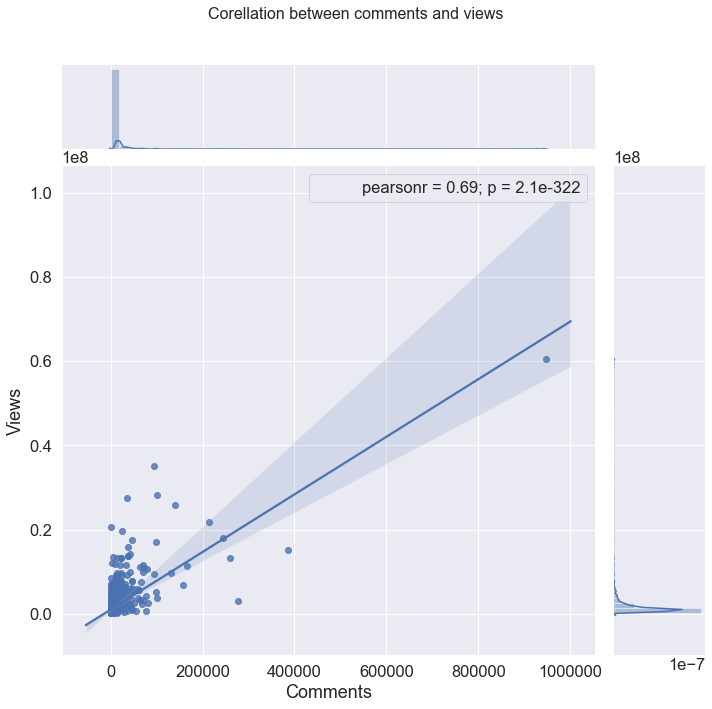

In [45]:
# Corellation between comments and views
comments_views = (sns.jointplot(data=videos_df, x='comment_count', y='view_count', kind='reg', height=10)
                .set_axis_labels("Comments", "Views"))
comments_views.annotate(stats.pearsonr)
comments_views.fig.subplots_adjust(top=0.9)
comments_views.fig.suptitle('Corellation between comments and views', fontsize=16)

Text(0.5, 0.98, 'Corellation between likes and comments')

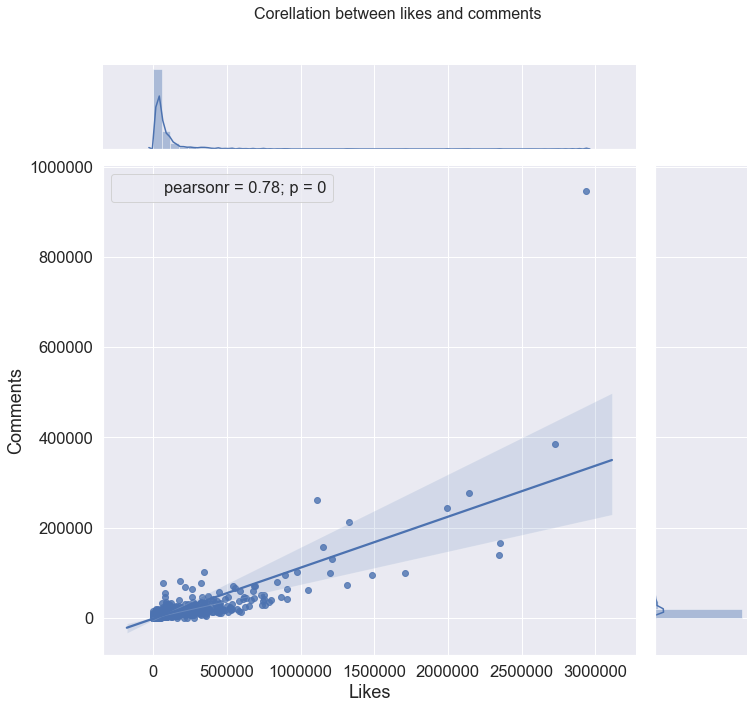

In [46]:
# Corellation between likes and comments
likes_comments = (sns.jointplot(data=videos_df, x='likes', y='comment_count', kind='reg', height=10)
                .set_axis_labels("Likes", "Comments"))
likes_comments.annotate(stats.pearsonr)
likes_comments.fig.subplots_adjust(top=0.9)
likes_comments.fig.suptitle('Corellation between likes and comments', fontsize=16)

Text(0.5, 0.98, 'Corellation between views and days in trending')

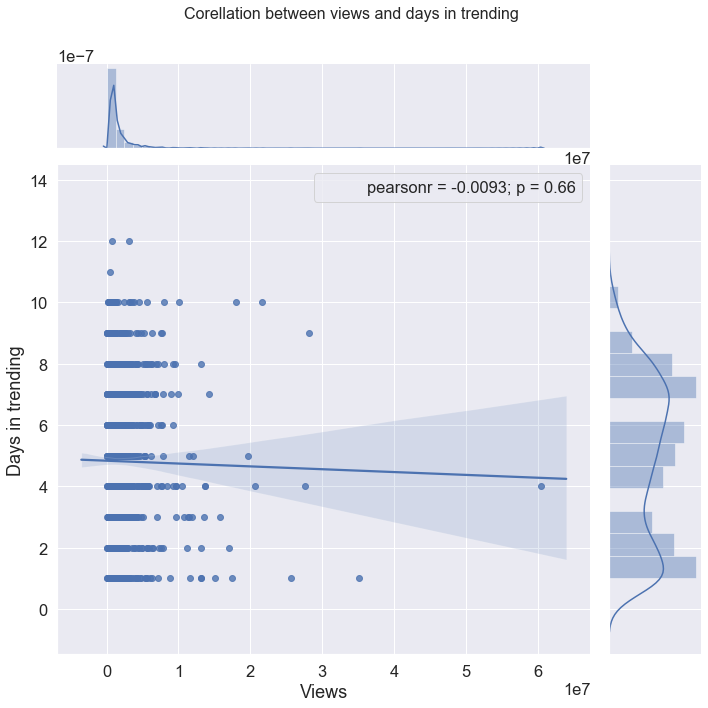

In [47]:
# Corellation between views and days in trending
views_trending = (sns.jointplot(data=videos_df, x='view_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Views", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between views and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN VIEWS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between likes and days in trending')

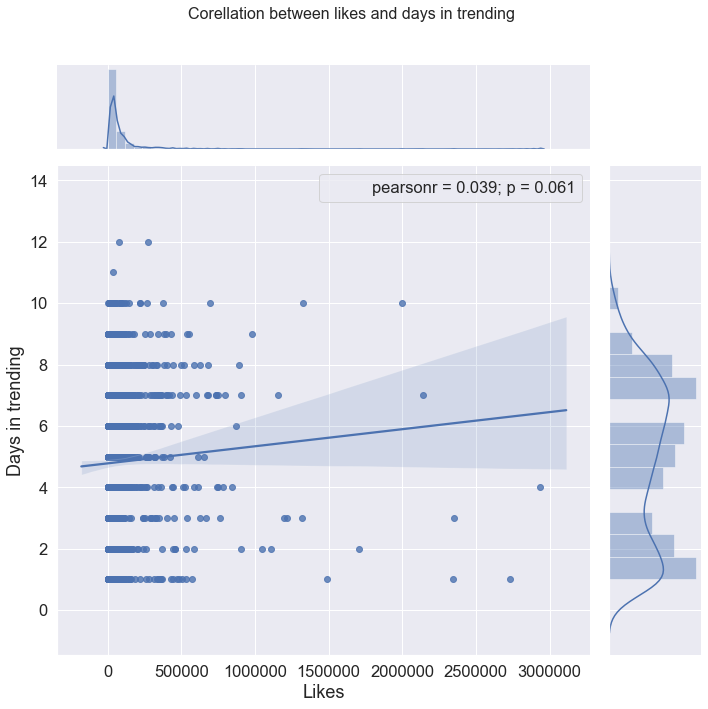

In [48]:
# Corellation between likes and days in trending
views_trending = (sns.jointplot(data=videos_df, x='likes', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Likes", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between likes and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN LIKES AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between comments and days in trending')

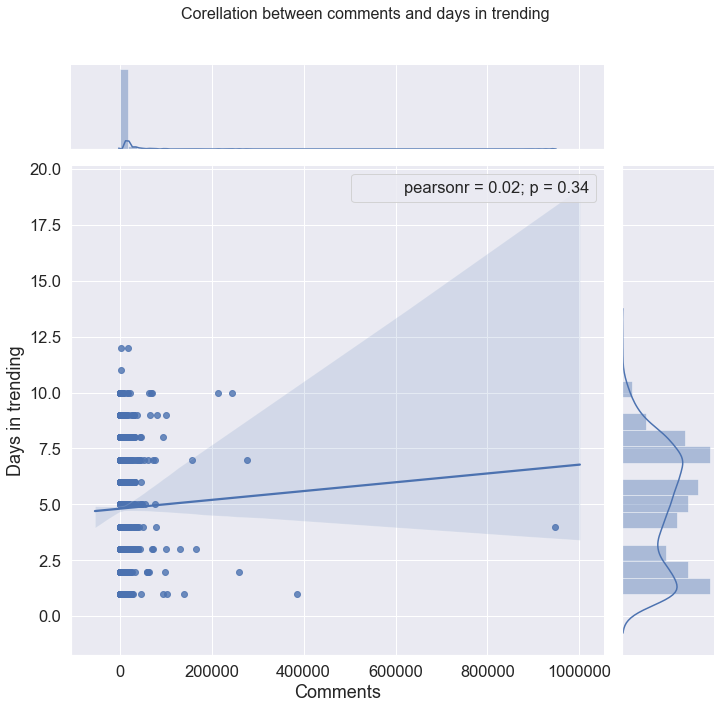

In [49]:
# Corellation between comments and days in trending
views_trending = (sns.jointplot(data=videos_df, x='comment_count', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Comments", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between comments and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN COMMENTS AND DAYS IN TRENDING!!!

Text(0.5, 0.98, 'Corellation between days to trend and days in trending')

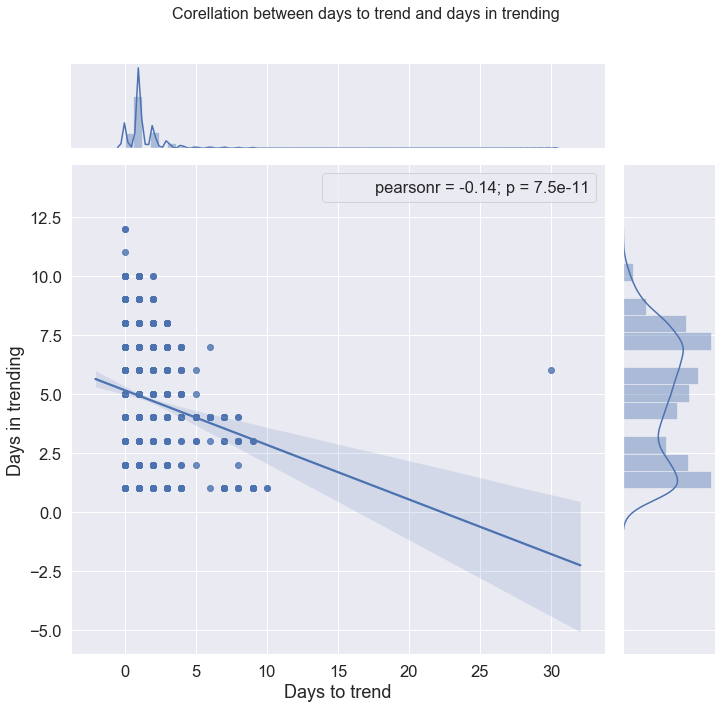

In [50]:
# Corellation between days to trend and days in trending
views_trending = (sns.jointplot(data=videos_df, x='publish_to_trend', y='days_in_trending', kind='reg', height=10)
                .set_axis_labels("Days to trend", "Days in trending"))
views_trending.annotate(stats.pearsonr)
views_trending.fig.subplots_adjust(top=0.9)
views_trending.fig.suptitle('Corellation between days to trend and days in trending', fontsize=16)

# THERE ISN'T ANY CORELLATION BETWEEN DAYS TO TREND AND DAYS IN TRENDING!!!

In [51]:
videos_df.head()

video_id                                              title  \
0  vPx6M7eTYbc     Spill Your Guts: Harry Styles & Kendall Jenner   
1  sg8WaeeFyNY                           WE GOT UNEXPECTED NEWS..   
2  q1PR05q8l2g                    Last To Miss Layup Wins $10,000   
3  t6Z6RIXq0L0  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...   
4  TGDpRB4ovvA  TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...   

         published_at                channel_id  \
0 2019-12-11 07:08:34  UCJ0uqCI0Vqr2Rrt1HseGirg   
1 2019-12-12 05:25:42  UCDSJCBYqL7VQrlXfhr1RtwA   
2 2019-12-11 23:00:53  UCQIUhhcmXsu6cN6n3y9-Pww   
3 2019-12-12 02:35:33  UCWJ2lWNubArHWmf3FIHbfcQ   
4 2019-12-12 02:38:37  UCtj45MepAoKxZoyR_Mnt86Q   

                          channel_title  category_id trending_date  \
0  The Late Late Show with James Corden           24    2019-12-12   
1                         Les Do Makeup           26    2019-12-12   
2                                Jesser           17    2019-12-12   
3                                   NBA           17    2019-12-12   
4                          Royal Family           24    2019-12-12   

                                                tags  view_count   likes  ...  \
0  The Late Late Show|Late Late Show|James Corden...    11636632  571835  ...   
1                                             [none]      423215   52780  ...   
2  last to leave|nba basketball|nba basketball hi...      463685   20178  ...   
3  sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...      659579    4605  ...   
4  queen Naija|Medicine|Queen|Spicy|Royalty Squad...      175558   18400  ...   

   comment_count                                  thumbnail_link  \
0          20068  https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg   
1          13130  https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg   
2            931  https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg   
3            668  https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg   
4           1907  https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg   

  comments_disabled  ratings_disabled  \
0             False             False   
1             False             False   
2             False             False   
3             False             False   
4             False             False   

                                         description days_in_trending  \
0  Late Late Show guest host Harry Styles challen...                1   
1  Hi babygirls!  Thank you so much for watching ...                7   
2  Last to miss the basketball shot wins 10,000!●...                7   
3  LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...                2   
4  LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...                6   

    category_name publish_to_trend  publishing_hour  publishing_day  
0   Entertainment                1                7       Wednesday  
1  How-to & Style                0                5        Thursday  
2           Sport                1               23       Wednesday  
3           Sport                0                2        Thursday  
4   Entertainment                0                2        Thursday  

[5 rows x 21 columns]

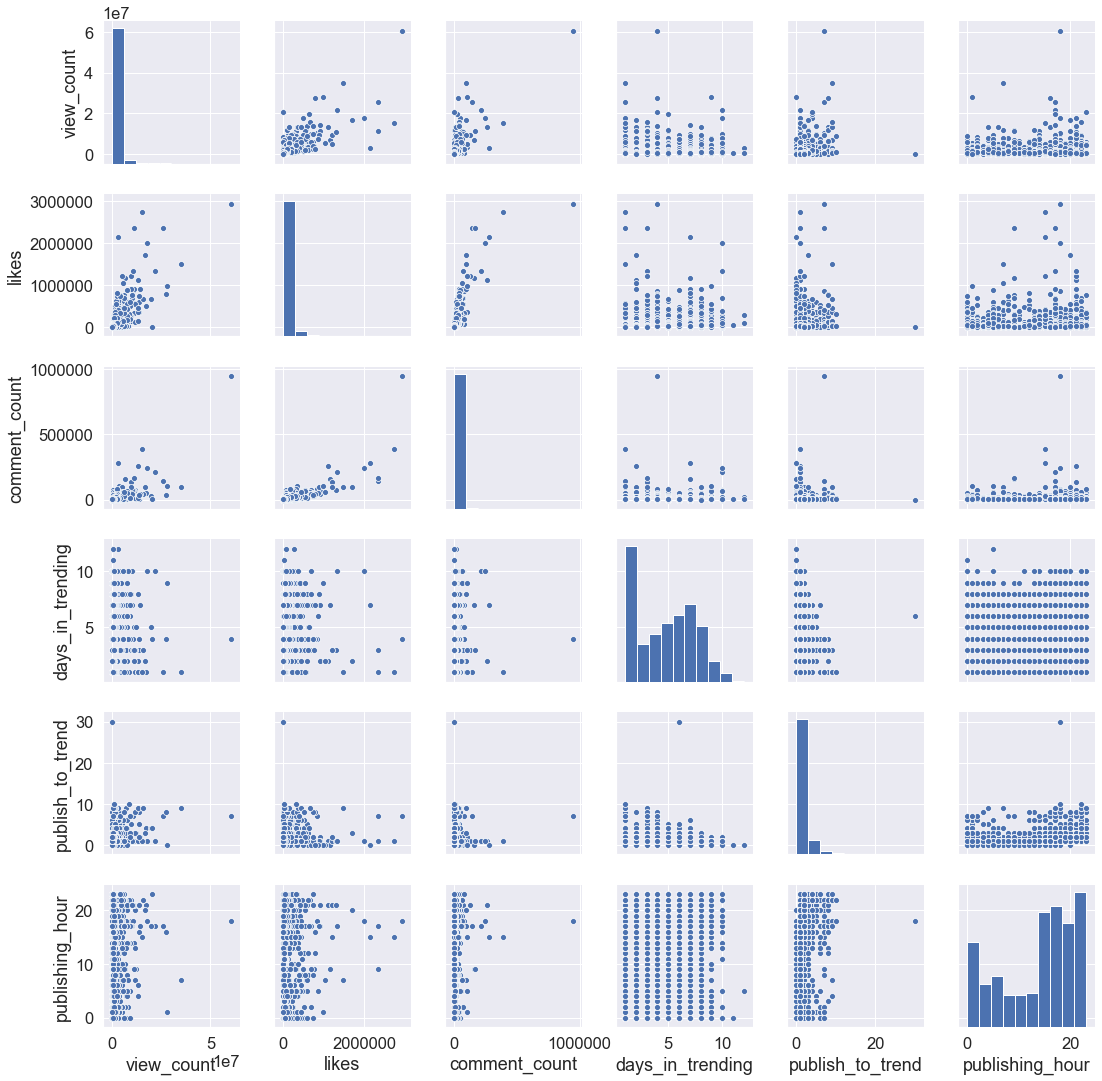

In [52]:
# treba dodati celobrojnu vrednost publishing_day-a
sns.pairplot(videos_df[['view_count', 'likes', 'comment_count', 'days_in_trending', 'publish_to_trend', 'publishing_hour']], palette='coolwarm')

# IT CAN BE SEEN THAT THERE IS A CORELLATION BETWEEN VIEW_COUNT, LIKES AND COMMENT_COUNT ()

# Inital model (regression)

### X and y arrays

In [53]:
X = videos_df[['view_count', 'dislikes', 'comment_count', 'category_id']]
y = videos_df['likes']
onehotencoder = OneHotEncoder(categorical_features = [3]) 
X = onehotencoder.fit_transform(X).toarray() 
X.size

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


38624

### Split data into training and test sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### Feature Scaling

In [55]:
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

#scaler_y = MinMaxScaler()
#y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
#y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))

### Linear regression

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [89]:
print(lin_reg.score(X_test, y_test))

0.8508312205057498


Text(0, 0.5, 'Predicted Y')

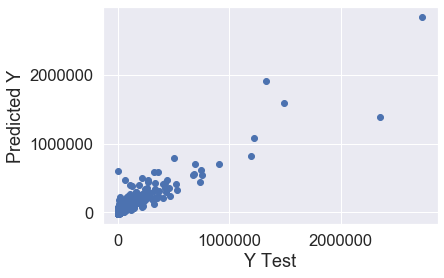

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', lin_reg.score(X_train, y_train))
print('R squared: ', lin_reg.score(X_test, y_test))

MAE: 35498.75513196481
MSE: 5750405222.388563
RMSE: 75831.42635074566
R squared on training set:  0.8511198046113193
R squared:  0.8508312205057498


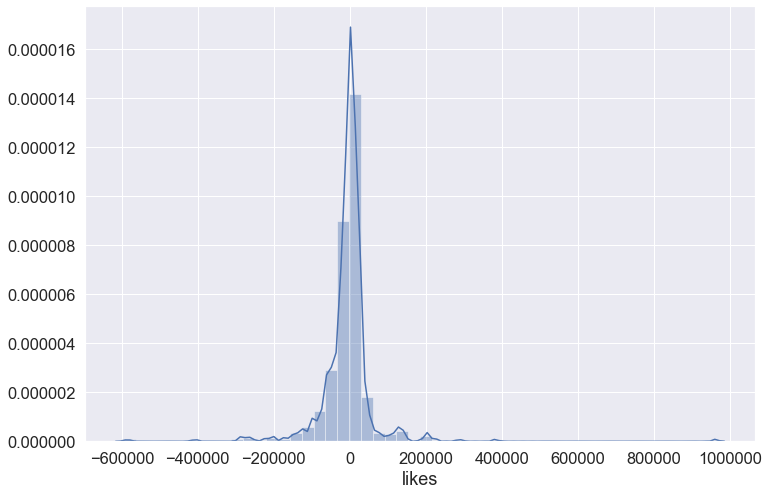

In [92]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Napomena: Rigde, Lasso i GradientBoosting ce verovatno bolje raditi kad bude vise feature-a

### Ridge regression with Grid Search
#### the results are worse than in linear regression

In [136]:
ridge_reg = Ridge(solver='cholesky')
#ridge_reg.fit(X_train, y_train)
#y_pred = ridge_reg.predict(X_test)

In [137]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(estimator=ridge_reg, param_grid=parameters, cv=5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_)

0.6675520710436311
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)


C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.96682e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2024e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46091e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19666e-17): result may not be accurate.
  overwrite_a=True).T


Text(0, 0.5, 'Predicted Y')

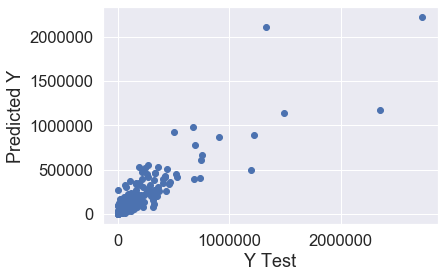

In [138]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', ridge_regressor.score(X_train, y_train))
print('R squared on test set: ', ridge_regressor.score(X_test, y_test))

MAE: 33523.612435436844
MSE: 7537916945.1271305
RMSE: 86821.17797592435
R squared on training set:  0.7077397829746359
R squared on test set:  0.6376797849155922


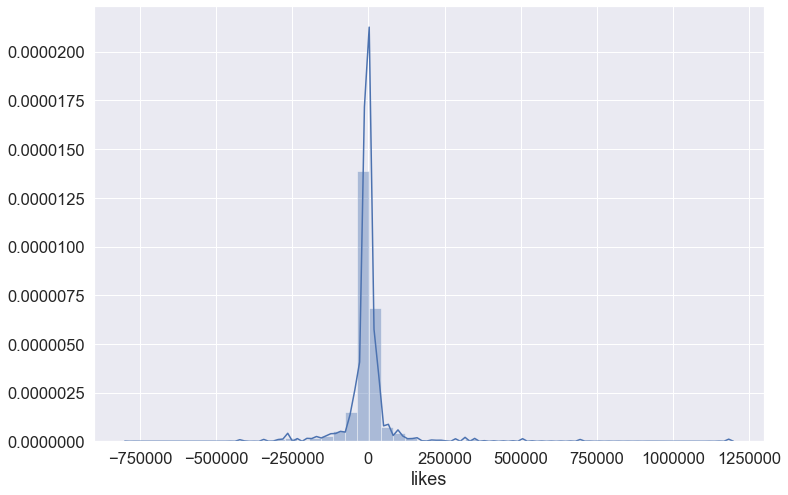

In [140]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

### Gradient Boosting regression with Grid Search

In [143]:
grad_boost_reg = GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'subsample': [0.9, 0.5, 0.2],
              'n_estimators': [10, 50, 100, 1000, 1000],
              'max_depth': [4, 6, 8],
              'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2]}
grid = GridSearchCV(estimator=grad_boost_reg, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

In [116]:
y_pred = grid.predict(X_test)

Text(0, 0.5, 'Predicted Y')

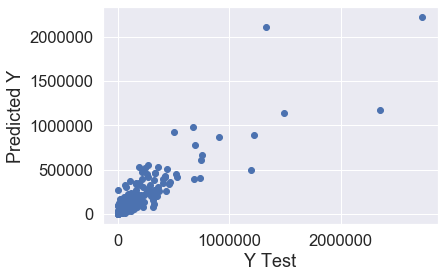

In [117]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', grid.score(X_train, y_train))
print('R squared on test set: ', grid.score(X_test, y_test))

MAE: 33523.612435436844
MSE: 7537916945.1271305
RMSE: 86821.17797592435
R squared on training set:  0.9569006681703582
R squared on test set:  0.8044621505531768


### Lasso regression with Grid Search

In [124]:
lasso_reg = Lasso()

In [125]:
parameters = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500, 1000, 1500, 2000]}
grid = GridSearchCV(estimator=lasso_reg, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500,
                                   1000, 1500, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
print(grid.best_score_)
print(grid.best_estimator_)

0.6335401522660639
Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
